In [1]:
import sys
sys.path.insert(0,'../src')

import cost_functions as cf
import opt_functions as of
import pandas as pd
import numpy as np
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
dist_mat=pd.read_csv("../dataset/Distance_Matrix.csv").drop(['Unnamed: 0'],axis=1).to_numpy()
df_biomass=pd.read_csv("../dataset//Biomass_History.csv")
forecast_df=pd.read_csv("../forecast/forecast_extratrees.csv")[["2019"]].rename({"2018":"biomass","2019":"biomass"},axis=1)
forecast=forecast_df.to_numpy()
forecast_df_2018=pd.read_csv("../forecast/forecast_extratrees.csv")[["2018"]].rename({"2018":"biomass","2019":"biomass"},axis=1)
forecast_2018=forecast_df.to_numpy()

In [3]:
forecast_df.sum(),forecast_df.sum()*0.8

(biomass    356121.491506
 dtype: float64,
 biomass    284897.193205
 dtype: float64)

<Axes: ylabel='Frequency'>

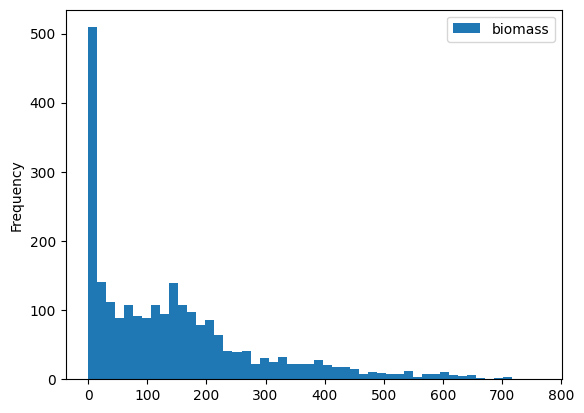

In [4]:
forecast_df.plot(kind="hist",y="biomass",bins=50)

Run optimization

In [10]:
final_raf_index,final_depot_index=of.run_optimization(dist_mat,forecast_df,index_thresh=200,raf_thresh=500,min_depot=15,max_depot=16,N_raf=3,max_iter=1,dlong=0.05,dlat=0.05,n=1,ignore=32000)

status: 1, Optimal
objective: 71115.24128515327
status: 1, Optimal
objective: 51254.137666296025
best run has cost of  51254.1376662955


File export based on the optimized depot / refineries indexes

In [9]:
raf_index=[985, 1292, 1861]
depot_index=  [989, 925, 985, 1038, 1039, 1176, 1177, 1292, 1359, 1424, 1809, 1751, 1860, 1861, 1862]


model=of.create_biomass_mat_lp_with_adjust(depot_index,raf_index,forecast,dist_mat)
biomass_mat,pellet_mat,adjust=of.get_matrices_from_lp(model,len(depot_index),len(raf_index))
forecast_new=adjust.flatten()+forecast.copy().flatten()

costs=cf.get_cost(depot_index,raf_index,biomass_mat,dist_mat,pellet_mat,forecast_new,adjust)

df=cf.create_submission_file(forecast_new,forecast_new,depot_index,raf_index,biomass_mat,biomass_mat,pellet_mat,pellet_mat)
df.to_csv("../submission/final_submission.csv",index=False)

status: 1, Optimal
objective: 26786.485214107557
